Enter the board size (n):  4


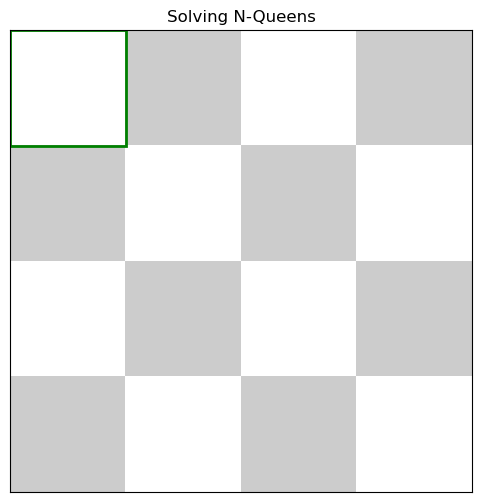

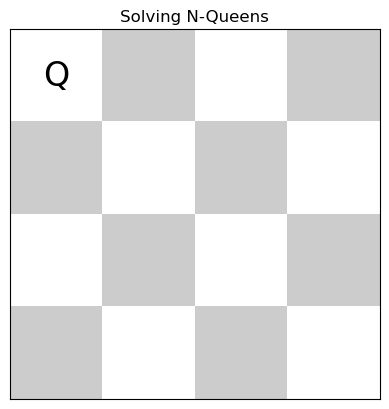

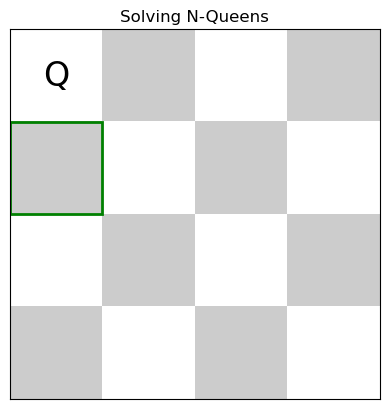

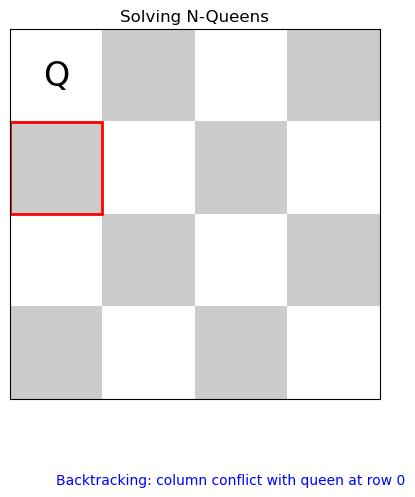

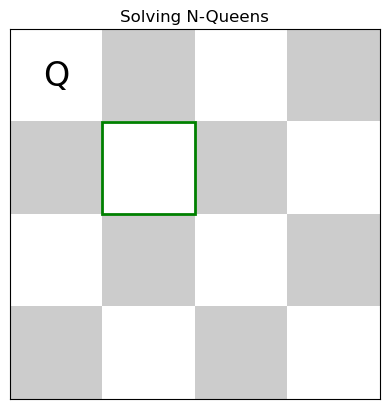

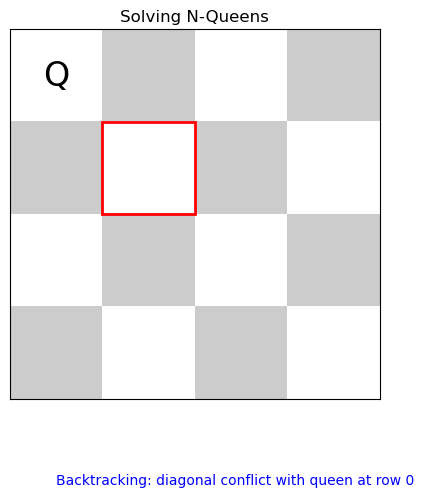

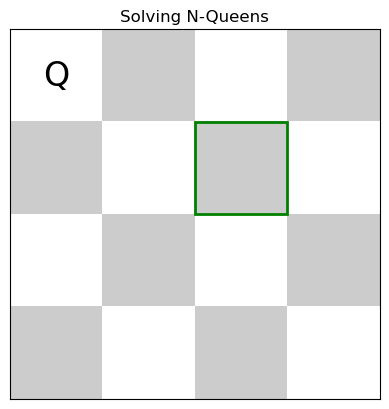

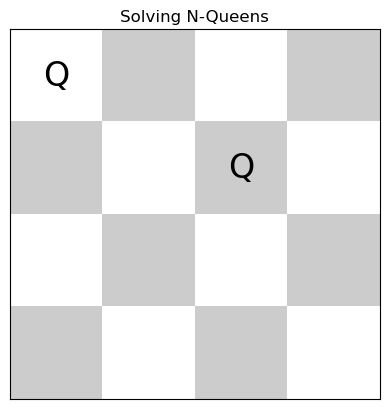

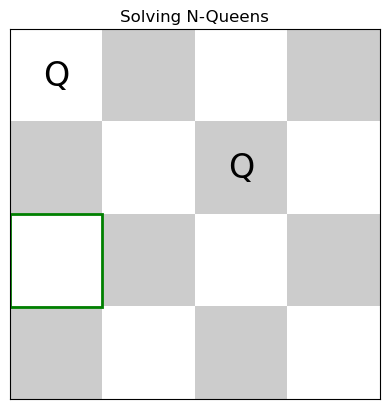

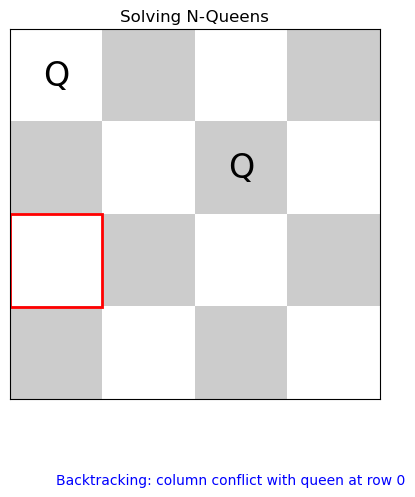

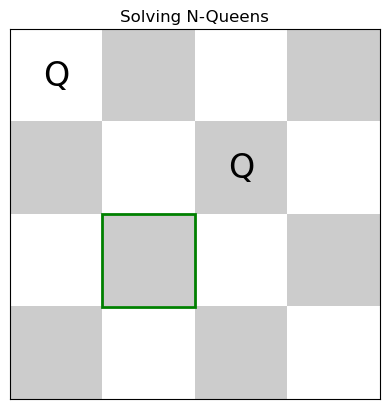

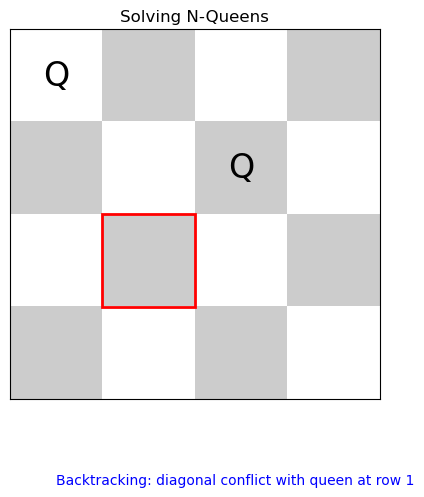

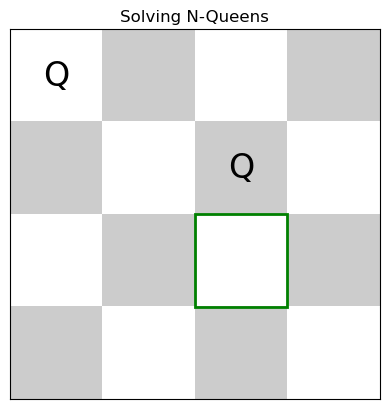

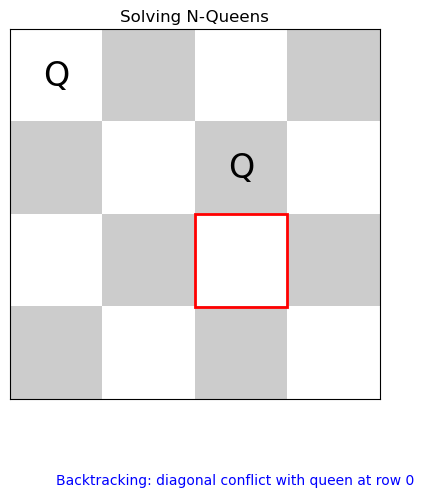

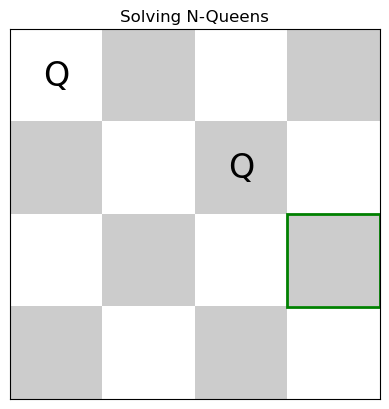

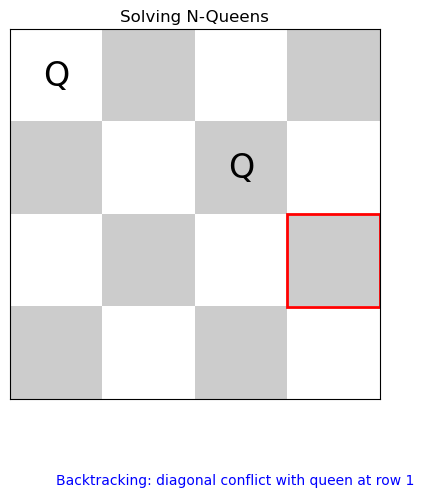

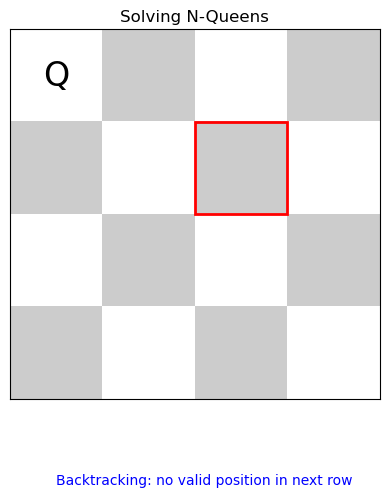

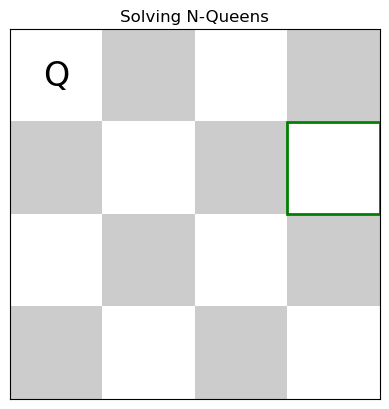

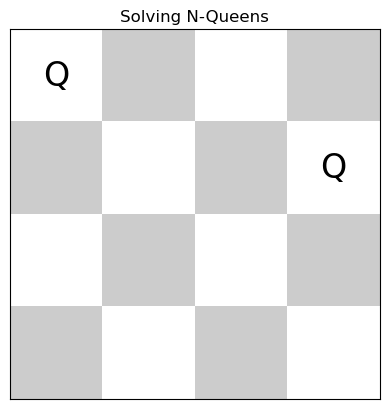

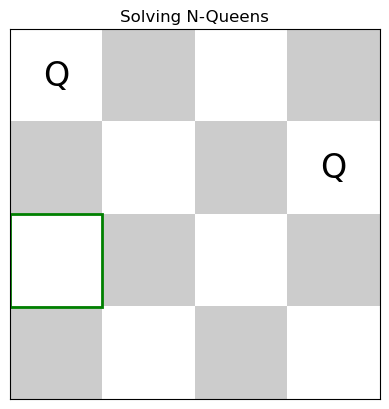

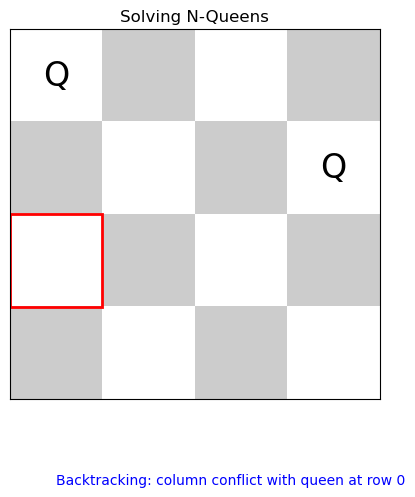

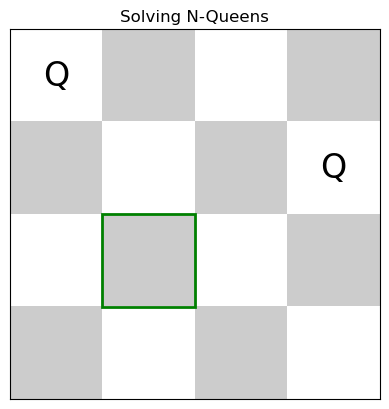

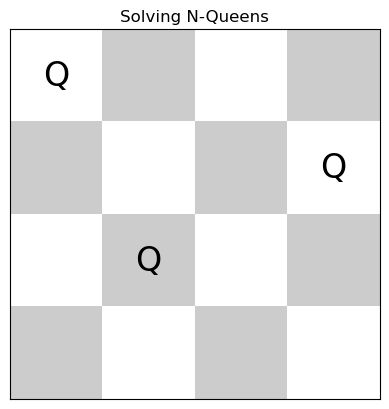

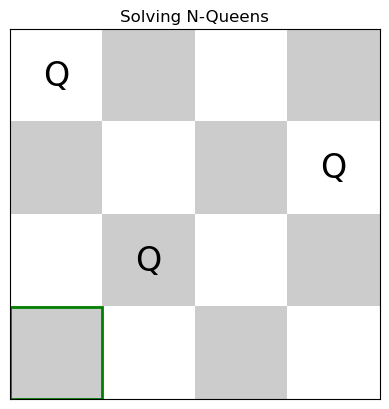

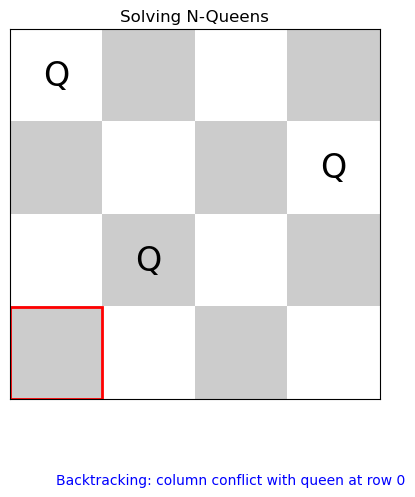

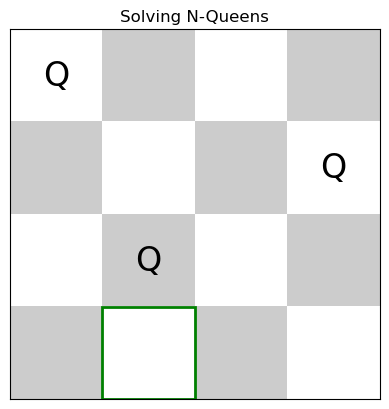

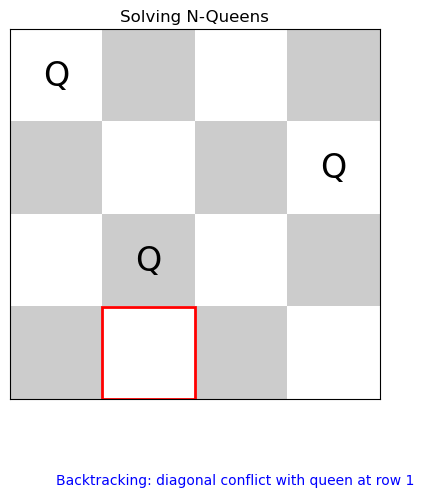

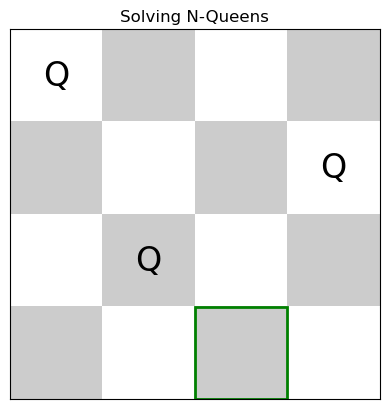

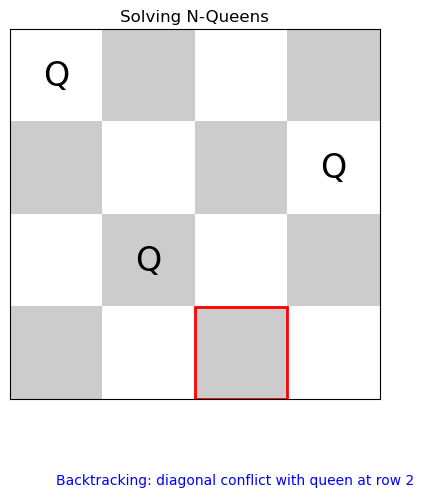

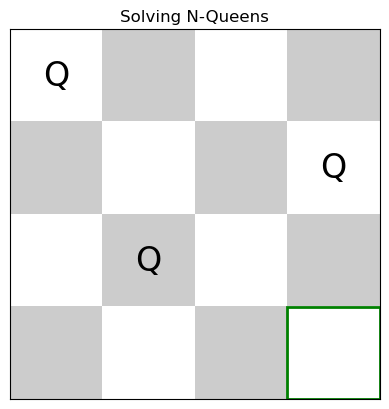

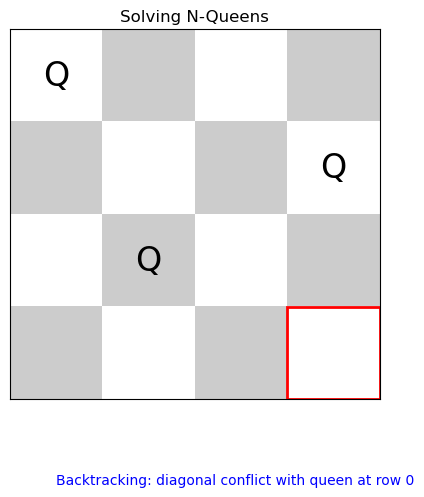

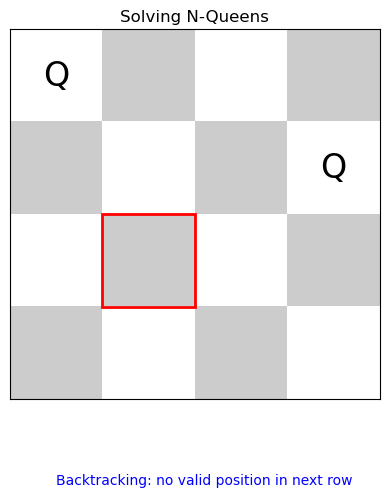

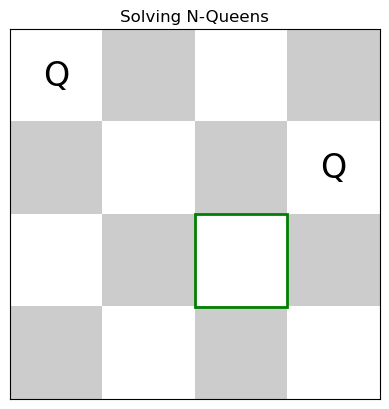

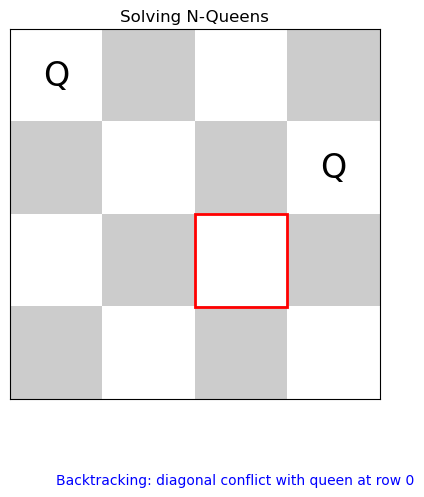

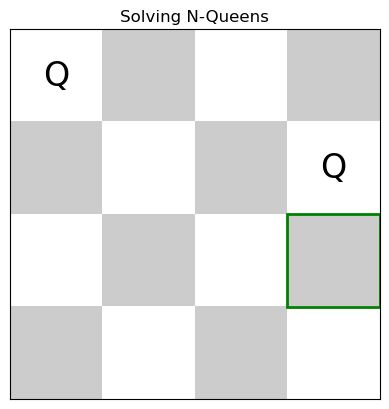

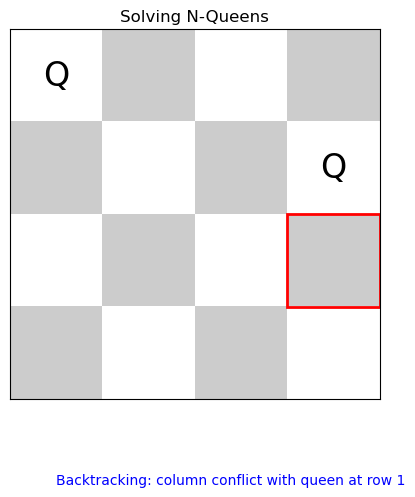

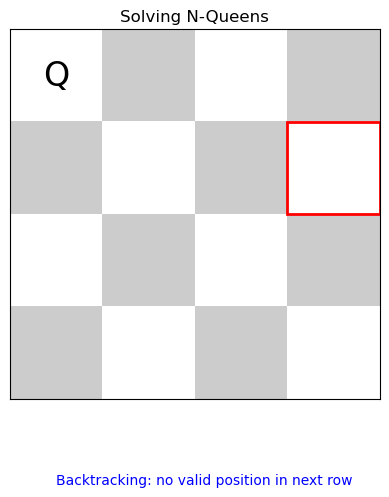

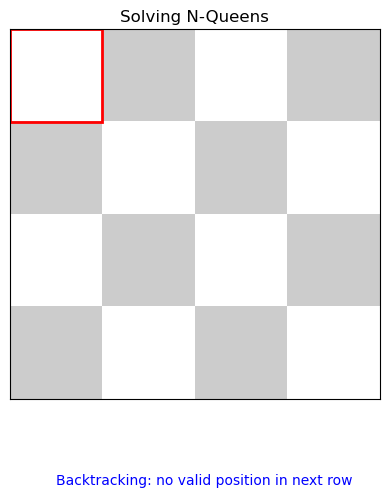

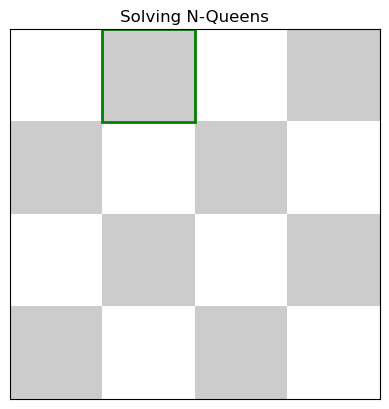

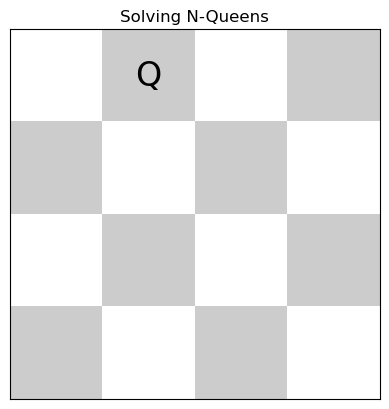

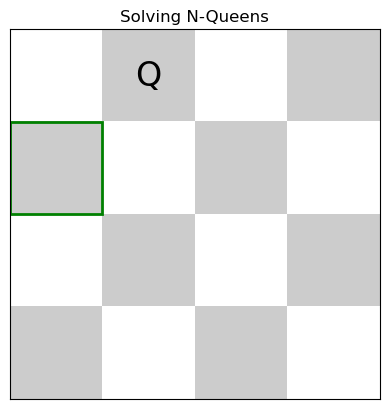

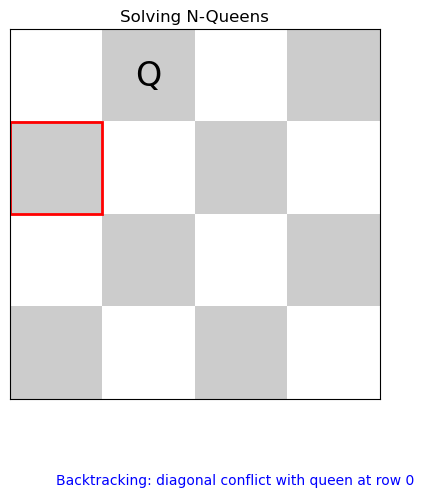

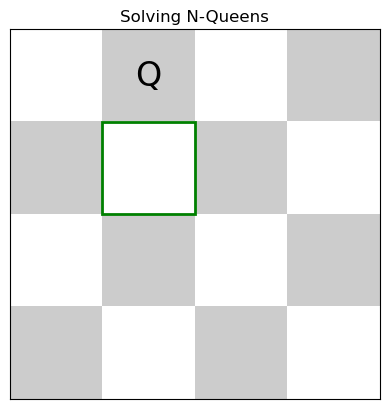

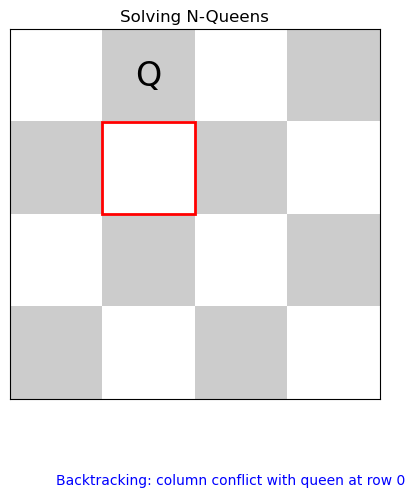

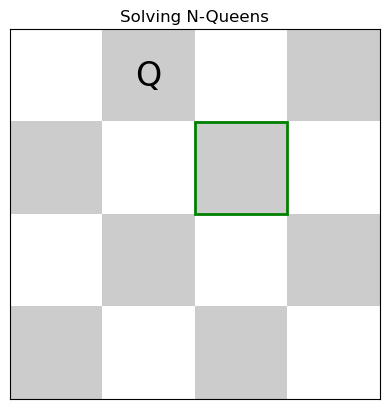

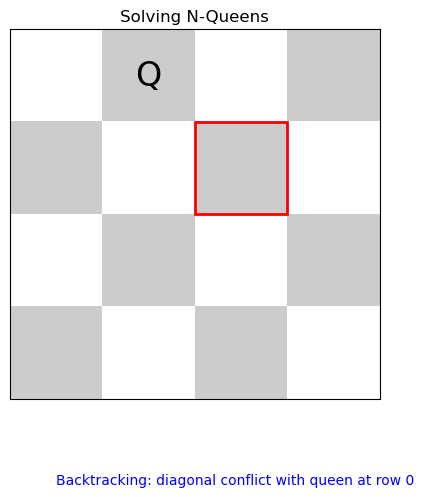

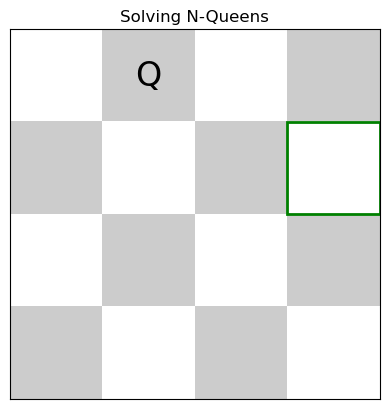

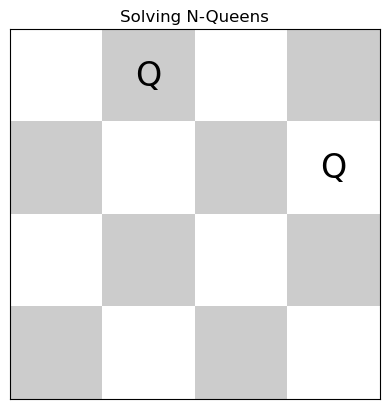

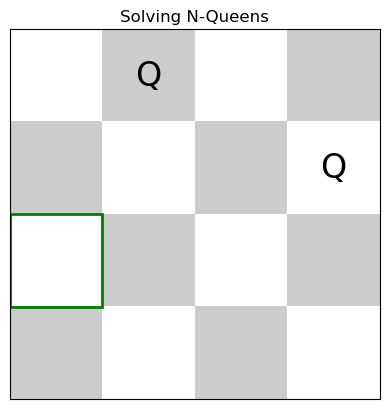

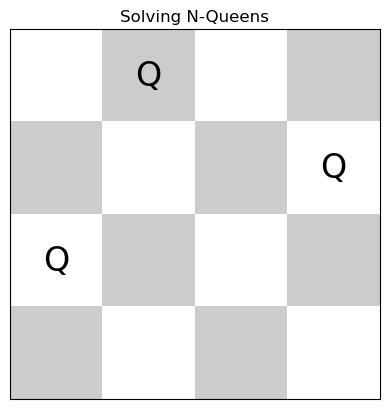

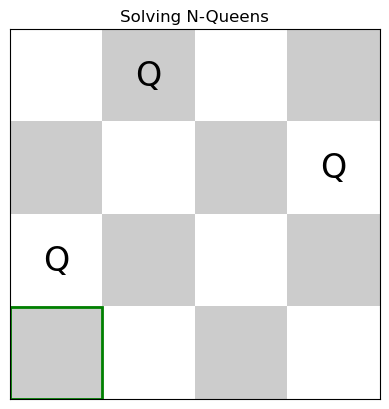

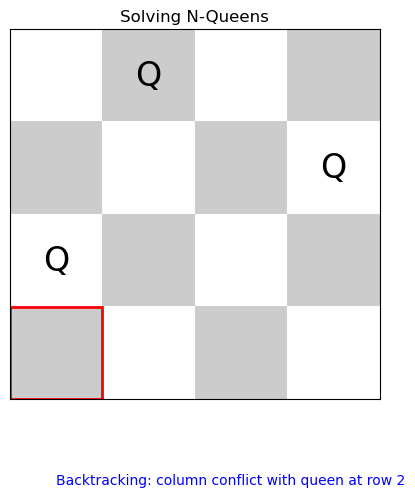

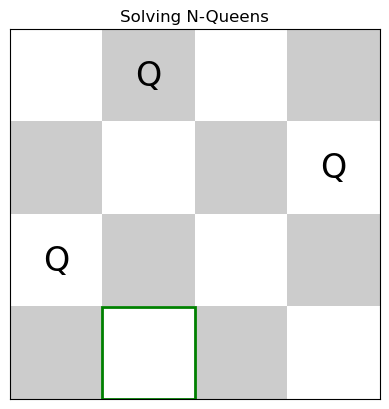

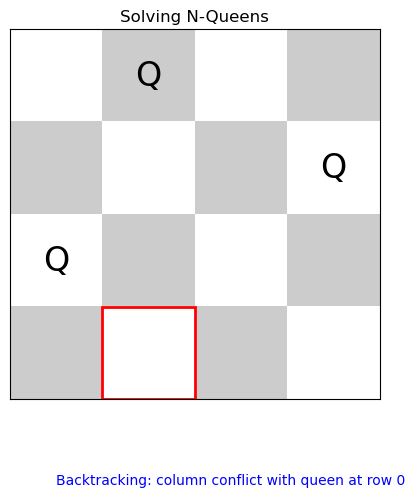

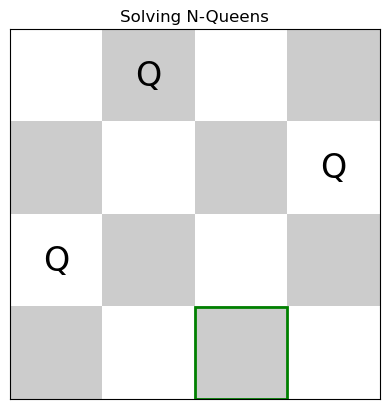

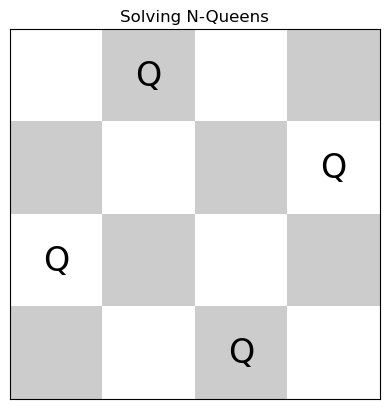

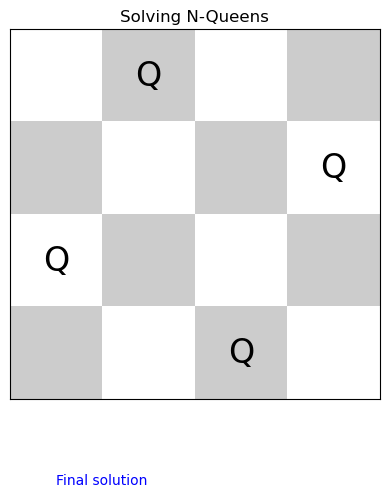

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import time

def is_safe(row, col, queens):
    for r in range(row):
        c = queens[r]
        if c == col:
            return False, f"column conflict with queen at row {r}"
        if abs(c - col) == abs(r - row):
            return False, f"diagonal conflict with queen at row {r}"
    return True, ""

def draw_board(queens, highlight=None, message="", delay=0.5):
    n = len(queens)
    board = np.zeros((n, n, 3))

    for i in range(n):
        for j in range(n):
            board[i][j] = [1, 1, 1] if (i + j) % 2 == 0 else [0.8, 0.8, 0.8]

    plt.clf()
    plt.imshow(board)

    for row in range(n):
        col = queens[row]
        if col != -1:
            plt.text(col, row, 'Q', fontsize=24, ha='center', va='center', color='black')

    if highlight:
        row, col, action = highlight
        color = 'green' if action == 'place' else 'red'
        plt.gca().add_patch(plt.Rectangle((col - 0.5, row - 0.5), 1, 1, linewidth=2, edgecolor=color, facecolor='none'))

    plt.xticks([])
    plt.yticks([])
    plt.title("Solving N-Queens")
    plt.text(0, n + 0.3, message, fontsize=10, ha='left', va='top', color='blue')
    plt.pause(delay)

def solve_n_queens(n):
    queens = [-1] * n

    def backtrack(row):
        if row == n:
            return True
        for col in range(n):
            safe, reason = is_safe(row, col, queens)
            draw_board(queens, highlight=(row, col, 'place'), delay=0.4)
            if safe:
                queens[row] = col
                draw_board(queens, delay=0.4)
                if backtrack(row + 1):
                    return True
                queens[row] = -1
                draw_board(queens, highlight=(row, col, 'backtrack'), message="Backtracking: no valid position in next row", delay=0.6)
            else:
                draw_board(queens, highlight=(row, col, 'backtrack'), message=f"Backtracking: {reason}", delay=0.6)
        return False

    plt.figure(figsize=(6, 6))
    result = backtrack(0)
    draw_board(queens, message="Final solution" if result else "No solution", delay=2)
    plt.show()

def main():
    try:
        n = int(input("Enter the board size (n): "))
        if n < 1:
            print("Board size must be at least 1.")
            return
        solve_n_queens(n)
    except ValueError:
        print("Invalid input. Please enter a number.")

if __name__ == "__main__":
    main()


In [11]:
queens = [-1] * 4
queens

[-1, -1, -1, -1]

In [15]:
for r in range(1):
    print(r)

0
